In [2]:
import os 
os.chdir(r'V:\DataScience\Projects\chronic_kidney_disease')
!dir

 Volume in drive V is New Volume
 Volume Serial Number is 0AB4-B062

 Directory of V:\DataScience\Projects\chronic_kidney_disease

04-07-2025  15:49    <DIR>          .
04-07-2025  11:18    <DIR>          ..
04-07-2025  16:55             4,713 app.py
04-07-2025  15:25    <DIR>          cancer
04-07-2025  11:18         1,023,324 Chronic_Kidney_Dsease_data.csv
04-07-2025  15:42           615,600 kidney.ipynb
04-07-2025  15:18           462,656 model.pkl
04-07-2025  15:49                93 requirements.txt
04-07-2025  15:18             1,317 scaler.pkl
               6 File(s)      2,107,703 bytes
               3 Dir(s)  101,966,389,248 bytes free


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# PROJECT PROCESS:
1. Importing the Lib
2. Loading the Dataset
3. Studing the Data Set
4. Data Cleaning
   - checking for null
   - Checking for duplicated rows
   - Checking the Data Type
   - Checking for Outliers
   - 
5. Visual Understanding
6. Feature selection
   - Feature Selection Between Continuous & Binary Columns :- T-Test
   - Feature Selection for Categorical and Categorical:- Chi-Square
   - Removing the Cloumns Failed in Hypothesis Test
7. Splitting
8. Handling the Imbalance Dataset
9. Scaling
10. Model Buliding
11. Selecting The Best Model
12. Handling The Overfit Issuse XG Boost
13. Pickpling The Model

# **2.LOADING THE DATA SET**

In [4]:
df=pd.read_csv('Chronic_Kidney_Dsease_data.csv')

1. Age: The age of the patients ranges from 20 to 90 years
2. Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
3. Ethnicity: The ethnicity of the patients, coded as follows:
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other
4. SocioeconomicStatus: The socioeconomic status of the patients, coded as follows:
    - 0: Low
    - 1: Middle
    - 2: High
5. EducationLevel: The education level of the patients, coded as follows:
    - 0: None
    - 1: High School
    - 2: Bachelor's
    - 3: Higher
6. BMI: Body Mass Index of the patients, ranging from 15 to 40.
7. Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
8. AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
9. PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
10. DietQuality: Diet quality score, ranging from 0 to 10.
11. SleepQuality: Sleep quality score, ranging from 4 to 10.
12. FamilyHistoryKidneyDisease: Family history of kidney disease, where 0 indicates No and 1 indicates Yes.
13. FamilyHistoryHypertension: Family history of hypertension, where 0 indicates No and 1 indicates Yes.
14. FamilyHistoryDiabetes: Family history of diabetes, where 0 indicates No and 1 indicates Yes.
15. PreviousAcuteKidneyInjury: History of previous acute kidney injury, where 0 indicates No and 1 indicates Yes.
16. UrinaryTractInfections: History of urinary tract infections, where 0 indicates No and 1 indicates Yes.
17. SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
18. DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
19. FastingBloodSugar: Fasting blood sugar levels, ranging from 70 to 200 mg/dL.
20. HbA1c: Hemoglobin A1c levels, ranging from 4.0% to 10.0%.
21. SerumCreatinine: Serum creatinine levels, ranging from 0.5 to 5.0 mg/dL.
22. BUNLevels: Blood Urea Nitrogen levels, ranging from 5 to 50 mg/dL.
23. GFR: Glomerular Filtration Rate, ranging from 15 to 120 mL/min/1.73 m².
24. ProteinInUrine: Protein levels in urine, ranging from 0 to 5 g/day.
25. ACR: Albumin-to-Creatinine Ratio, ranging from 0 to 300 mg/g.
26. SerumElectrolytesSodium: Serum sodium levels, ranging from 135 to 145 mEq/L.
27. SerumElectrolytesPotassium: Serum potassium levels, ranging from 3.5 to 5.5 mEq/L.
28. SerumElectrolytesCalcium: Serum calcium levels, ranging from 8.5 to 10.5 mg/dL.
29. SerumElectrolytesPhosphorus: Serum phosphorus levels, ranging from 2.5 to 4.5 mg/dL.
30. HemoglobinLevels: Hemoglobin levels, ranging from 10 to 18 g/dL.
31. CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
32. CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
33. CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
34. CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
35. ACEInhibitors: Use of ACE inhibitors, where 0 indicates No and 1 indicates Yes.
36. Diuretics: Use of diuretics, where 0 indicates No and 1 indicates Yes.
37. NSAIDsUse: Frequency of NSAIDs use, ranging from 0 to 10 times per week.
38. Statins: Use of statins, where 0 indicates No and 1 indicates Yes.
39. AntidiabeticMedications: Use of antidiabetic medications, where 0 indicates No and 1 indicates Yes.
40. Edema: Presence of edema, where 0 indicates No and 1 indicates Yes.
41. FatigueLevels: Fatigue levels, ranging from 0 to 10.
42. NauseaVomiting: Frequency of nausea and vomiting, ranging from 0 to 7 times per week.
43. MuscleCramps: Frequency of muscle cramps, ranging from 0 to 7 times per week.
44. Itching: Itching severity, ranging from 0 to 10.
45. QualityOfLifeScore: Quality of life score, ranging from 0 to 100.
46. HeavyMetalsExposure: Exposure to heavy metals, where 0 indicates No and 1 indicates Yes.
47. OccupationalExposureChemicals: Occupational exposure to harmful chemicals, where 0 indicates No and 1 indicates Yes.
48. WaterQuality: Quality of water, where 0 indicates Good and 1 indicates Poor.
49. MedicalCheckupsFrequency: Frequency of medical check-ups per year, ranging from 0 to 4.
50. MedicationAdherence: Medication adherence score, ranging from 0 to 10.
51. HealthLiteracy: Health literacy score, ranging from 0 to 10.
52. Diagnosis: Diagnosis status for Chronic Kidney Disease, where 0 indicates No and 1 indicates Yes.

# **3. STUDING THE DATA SET**

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [8]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.0000

In [9]:
df.describe(include='object')

,DoctorInCharge
count,1659
unique,1
top,Confidential
freq,1659


In [10]:
no_rows,no_columns=df.shape
print('Number of Rows:',no_rows)
print('Numbeer of columns:',no_columns)

Number of Rows: 1659
Numbeer of columns: 54


In [11]:
# Seeing the number unique values
for i in df.columns:
    print('COLUMN NAME:',i)
    print('Number of unique values:',df[i].nunique())
    a=df[i].nunique()
    if a <= 10 :
        print(df[i].value_counts())
    print('---------------------------------')

COLUMN NAME: PatientID
Number of unique values: 1659
---------------------------------
COLUMN NAME: Age
Number of unique values: 71
---------------------------------
COLUMN NAME: Gender
Number of unique values: 2
Gender
1    855
0    804
Name: count, dtype: int64
---------------------------------
COLUMN NAME: Ethnicity
Number of unique values: 4
Ethnicity
0    974
1    349
2    174
3    162
Name: count, dtype: int64
---------------------------------
COLUMN NAME: SocioeconomicStatus
Number of unique values: 3
SocioeconomicStatus
1    658
0    519
2    482
Name: count, dtype: int64
---------------------------------
COLUMN NAME: EducationLevel
Number of unique values: 4
EducationLevel
2    668
1    480
3    331
0    180
Name: count, dtype: int64
---------------------------------
COLUMN NAME: BMI
Number of unique values: 1659
---------------------------------
COLUMN NAME: Smoking
Number of unique values: 2
Smoking
0    1173
1     486
Name: count, dtype: int64
------------------------------

In [12]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 53
Num of Categorical Features : 1
Num of Discrete Features : 19
Num of Continuous Features : 34


# **4.DATA CLEANING**

## 4.1 Checking for Null Values

df.isnull().sum()

we don't have any null values in the data set

## 4.2 Checking For The Duplicated Rows


In [13]:
print(df.duplicated().sum())

0


we don't have any duplicates in the data set

## 4.3 Checking the Data Type

In [14]:
for col in df.columns:
    types_in_col = df[col].map(type).nunique()
    if types_in_col > 1:
        unique_types = df[col].map(type).unique()
        print(f"Column '{col}' has mixed data types: {[t.__name__ for t in unique_types]}")

The values inside each column have the same datatype

## 4.4 Checking For The Outliers

________________________________________________________________________

Column: PatientID
Lower bound: -828.0
Upper bound: 2488.0
Outliers:
Empty DataFrame
Columns: [PatientID]
Index: []


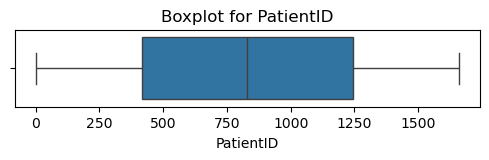

________________________________________________________________________

Column: Age
Lower bound: -18.0
Upper bound: 126.0
Outliers:
Empty DataFrame
Columns: [Age]
Index: []


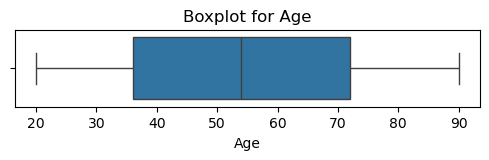

________________________________________________________________________

Column: BMI
Lower bound: 2.6548483569806116
Upper bound: 52.832449454084994
Outliers:
Empty DataFrame
Columns: [BMI]
Index: []


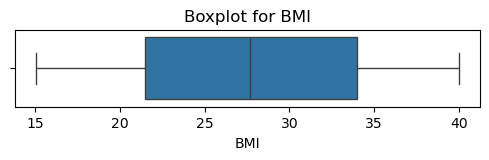

________________________________________________________________________

Column: AlcoholConsumption
Lower bound: -9.822759346398257
Upper bound: 29.84101540874724
Outliers:
Empty DataFrame
Columns: [AlcoholConsumption]
Index: []


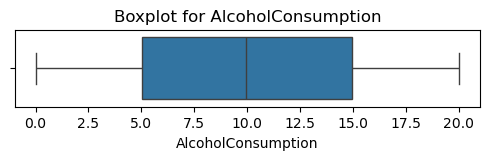

________________________________________________________________________

Column: PhysicalActivity
Lower bound: -4.803248823208397
Upper bound: 14.818850116401663
Outliers:
Empty DataFrame
Columns: [PhysicalActivity]
Index: []


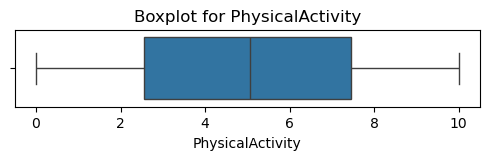

________________________________________________________________________

Column: DietQuality
Lower bound: -4.746326646206228
Upper bound: 14.73305933471768
Outliers:
Empty DataFrame
Columns: [DietQuality]
Index: []


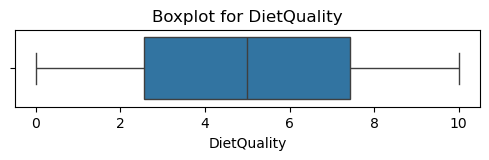

________________________________________________________________________

Column: SleepQuality
Lower bound: 1.1982597298762858
Upper bound: 12.63512153733352
Outliers:
Empty DataFrame
Columns: [SleepQuality]
Index: []


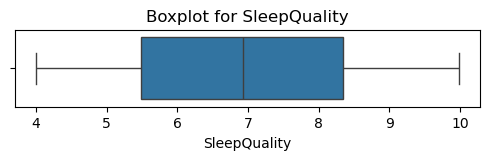

________________________________________________________________________

Column: SystolicBP
Lower bound: 47.0
Upper bound: 223.0
Outliers:
Empty DataFrame
Columns: [SystolicBP]
Index: []


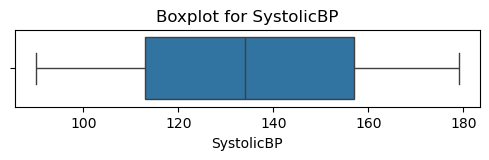

________________________________________________________________________

Column: DiastolicBP
Lower bound: 31.5
Upper bound: 147.5
Outliers:
Empty DataFrame
Columns: [DiastolicBP]
Index: []


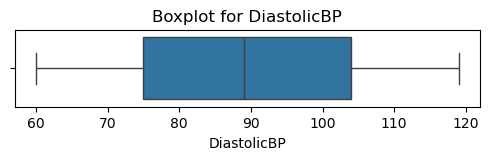

________________________________________________________________________

Column: FastingBloodSugar
Lower bound: 6.599030903895525
Upper bound: 257.0136223293529
Outliers:
Empty DataFrame
Columns: [FastingBloodSugar]
Index: []


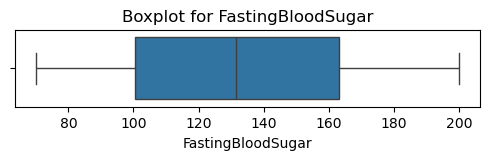

________________________________________________________________________

Column: HbA1c
Lower bound: 0.9521281067229976
Upper bound: 13.066421680679248
Outliers:
Empty DataFrame
Columns: [HbA1c]
Index: []


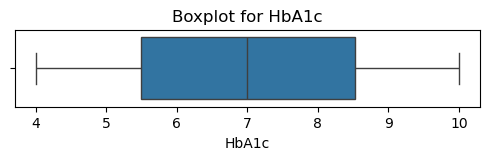

________________________________________________________________________

Column: SerumCreatinine
Lower bound: -1.876607547261711
Upper bound: 7.349692923718185
Outliers:
Empty DataFrame
Columns: [SerumCreatinine]
Index: []


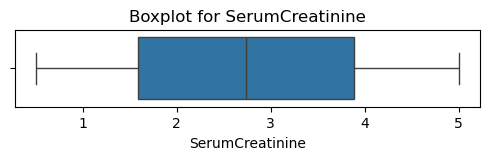

________________________________________________________________________

Column: BUNLevels
Lower bound: -16.195400312185733
Upper bound: 70.72106625511813
Outliers:
Empty DataFrame
Columns: [BUNLevels]
Index: []


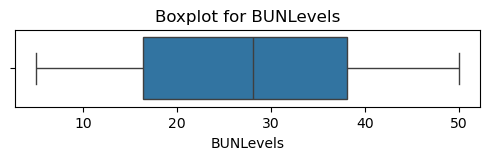

________________________________________________________________________

Column: GFR
Lower bound: -35.70909236668574
Upper bound: 169.2466856266571
Outliers:
Empty DataFrame
Columns: [GFR]
Index: []


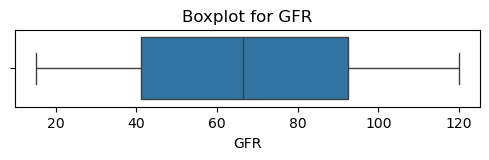

________________________________________________________________________

Column: ProteinInUrine
Lower bound: -2.5572055669054103
Upper bound: 7.532236877465649
Outliers:
Empty DataFrame
Columns: [ProteinInUrine]
Index: []


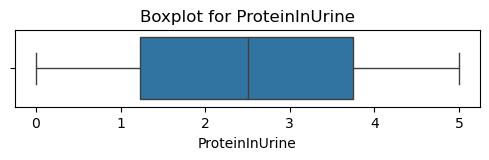

________________________________________________________________________

Column: ACR
Lower bound: -145.6259509643569
Upper bound: 447.4681673664702
Outliers:
Empty DataFrame
Columns: [ACR]
Index: []


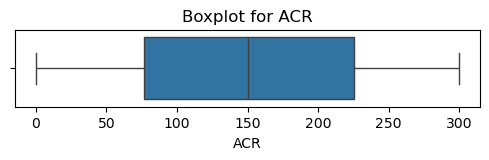

________________________________________________________________________

Column: SerumElectrolytesSodium
Lower bound: 129.90721701730507
Upper bound: 150.11080667500875
Outliers:
Empty DataFrame
Columns: [SerumElectrolytesSodium]
Index: []


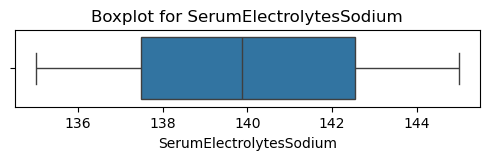

________________________________________________________________________

Column: SerumElectrolytesPotassium
Lower bound: 2.449424154648776
Upper bound: 6.567117251706357
Outliers:
Empty DataFrame
Columns: [SerumElectrolytesPotassium]
Index: []


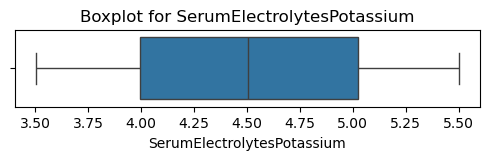

________________________________________________________________________

Column: SerumElectrolytesCalcium
Lower bound: 7.535947960770751
Upper bound: 11.452055648064178
Outliers:
Empty DataFrame
Columns: [SerumElectrolytesCalcium]
Index: []


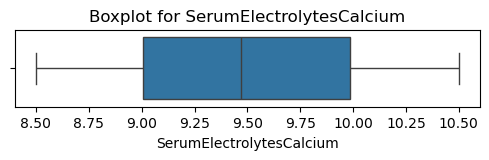

________________________________________________________________________

Column: SerumElectrolytesPhosphorus
Lower bound: 1.4476543316589292
Upper bound: 5.546800483406672
Outliers:
Empty DataFrame
Columns: [SerumElectrolytesPhosphorus]
Index: []


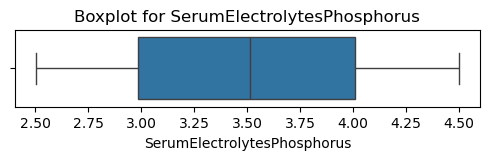

________________________________________________________________________

Column: HemoglobinLevels
Lower bound: 5.580568492089041
Upper bound: 22.27099340802029
Outliers:
Empty DataFrame
Columns: [HemoglobinLevels]
Index: []


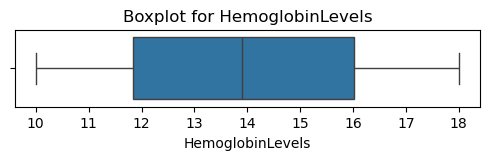

________________________________________________________________________

Column: CholesterolTotal
Lower bound: 72.07955343335843
Upper bound: 377.0433347177517
Outliers:
Empty DataFrame
Columns: [CholesterolTotal]
Index: []


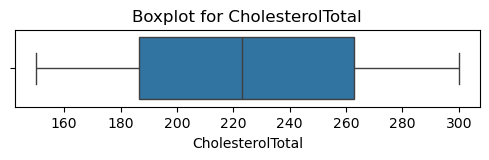

________________________________________________________________________

Column: CholesterolLDL
Lower bound: -20.680076330096583
Upper bound: 268.2277231995503
Outliers:
Empty DataFrame
Columns: [CholesterolLDL]
Index: []


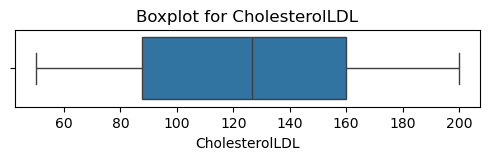

________________________________________________________________________

Column: CholesterolHDL
Lower bound: -17.452102949665914
Upper bound: 139.092379625685
Outliers:
Empty DataFrame
Columns: [CholesterolHDL]
Index: []


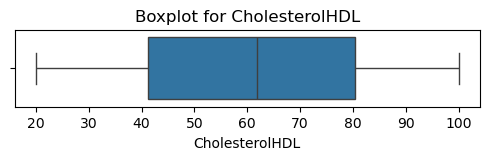

________________________________________________________________________

Column: CholesterolTriglycerides
Lower bound: -114.08541507494758
Upper bound: 564.1037102710056
Outliers:
Empty DataFrame
Columns: [CholesterolTriglycerides]
Index: []


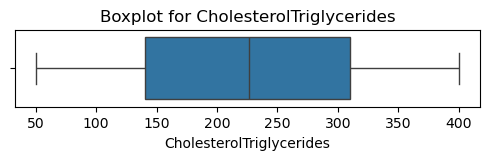

________________________________________________________________________

Column: NSAIDsUse
Lower bound: -4.679245147829913
Upper bound: 14.785115068264513
Outliers:
Empty DataFrame
Columns: [NSAIDsUse]
Index: []


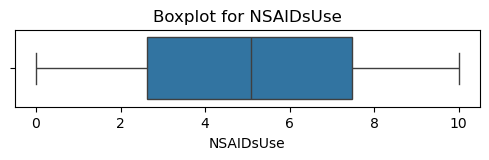

________________________________________________________________________

Column: FatigueLevels
Lower bound: -5.187250446057958
Upper bound: 15.217938499952325
Outliers:
Empty DataFrame
Columns: [FatigueLevels]
Index: []


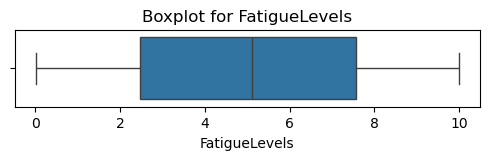

________________________________________________________________________

Column: NauseaVomiting
Lower bound: -3.503081078725823
Upper bound: 10.50689853331256
Outliers:
Empty DataFrame
Columns: [NauseaVomiting]
Index: []


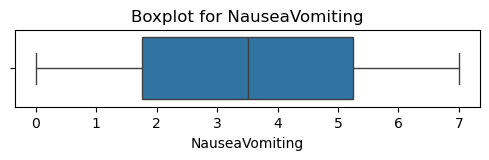

________________________________________________________________________

Column: MuscleCramps
Lower bound: -3.330451176398664
Upper bound: 10.406200147686528
Outliers:
Empty DataFrame
Columns: [MuscleCramps]
Index: []


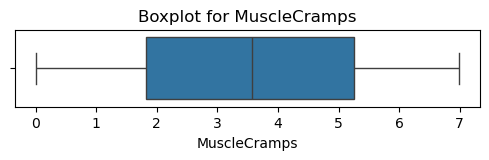

________________________________________________________________________

Column: Itching
Lower bound: -4.995972506954444
Upper bound: 15.080931562458296
Outliers:
Empty DataFrame
Columns: [Itching]
Index: []


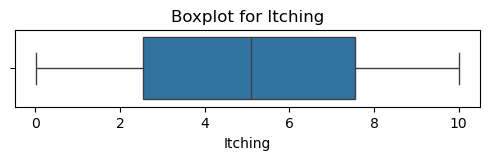

________________________________________________________________________

Column: QualityOfLifeScore
Lower bound: -43.39172527766918
Upper bound: 144.2974304600706
Outliers:
Empty DataFrame
Columns: [QualityOfLifeScore]
Index: []


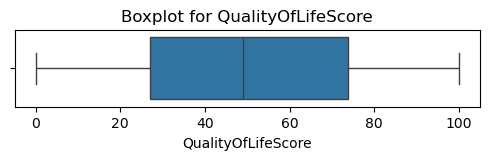

________________________________________________________________________

Column: MedicalCheckupsFrequency
Lower bound: -1.9063137789435936
Upper bound: 5.859328588156909
Outliers:
Empty DataFrame
Columns: [MedicalCheckupsFrequency]
Index: []


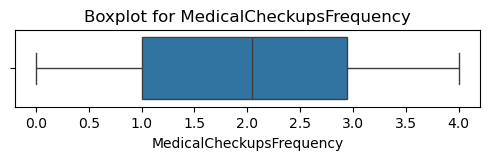

________________________________________________________________________

Column: MedicationAdherence
Lower bound: -5.004376882873649
Upper bound: 15.002278702480194
Outliers:
Empty DataFrame
Columns: [MedicationAdherence]
Index: []


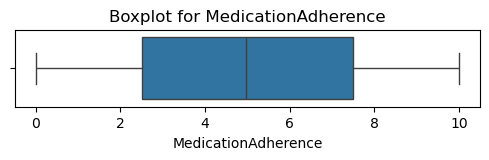

________________________________________________________________________

Column: HealthLiteracy
Lower bound: -5.175977634501994
Upper bound: 15.478791510878704
Outliers:
Empty DataFrame
Columns: [HealthLiteracy]
Index: []


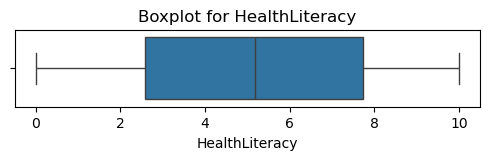

In [15]:
for col in df[continuous_features].columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print('________________________________________________________________________')
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outliers:\n{outliers[[col]]}")

    # Boxplot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


we don't have any outliers in the data set

# **5. Visual Understanding**

# **6.FEATURE SELECTION** 
## Hypothesis Testing
### Target Column : Diagnosis (Binary Categorical)

In [16]:
print(df['Diagnosis'].unique())

[1 0]


### 6.1. Feature Selection Between Continuous & Binary Columns :- T-Test

In [17]:
from scipy.stats import ttest_ind
continuous_features_rejected=[]
for i in continuous_features :
    print(f"Column Name {i}")
    # Group by Diagnosis
    class_0 = df[df['Diagnosis'] == 0][i]
    class_1 = df[df['Diagnosis'] == 1][i]
    
    # t-test,p-val
    t_stat, p_val = ttest_ind(class_0,class_1)
    
    print('P-value:', p_val)
    
    if p_val < 0.05:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")
        continuous_features_rejected.append(i)
    print()
    print("-"*100)

Column Name PatientID
P-value: 2.0906814417736716e-12
Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name Age
P-value: 0.9701545807886243
Fail to Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name BMI
P-value: 0.024495796371735337
Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name AlcoholConsumption
P-value: 0.7993516139585543
Fail to Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name PhysicalActivity
P-value: 0.38038906754839164
Fail to Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name DietQuality
P-value: 0.06995844879848494
Fail to Reject Null Hypothesis

-----

In [18]:
continuous_features_rejected

['Age',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'DiastolicBP',
 'ACR',
 'SerumElectrolytesSodium',
 'SerumElectrolytesPotassium',
 'SerumElectrolytesCalcium',
 'SerumElectrolytesPhosphorus',
 'HemoglobinLevels',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'NSAIDsUse',
 'FatigueLevels',
 'NauseaVomiting',
 'QualityOfLifeScore',
 'MedicalCheckupsFrequency',
 'MedicationAdherence',
 'HealthLiteracy']

In [19]:
print(f"Number Countinuous Features : {len(continuous_features)}")
print(f"Number Countinuous Features Failed in T-test : {len(continuous_features_rejected)}")

Number Countinuous Features : 34
Number Countinuous Features Failed in T-test : 23


## 6.2.Feature Selection for Categorical and Categorical:- Chi-Square  

In [20]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

In [21]:
discrete_df=df[discrete_features]
discrete_df

,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,ACEInhibitors,Diuretics,Statins,AntidiabeticMedications,Edema,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis
0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,0,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1
3,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,2,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,0,0,1,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1655,0,0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1656,0,0,2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1657,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
y=df['Diagnosis']

In [23]:
from sklearn.feature_selection import chi2
discrete_features_failed_chi=[]
chi_scores,p_values=chi2(discrete_df,y)
alpha=0.5
for feature, score, p_val in zip(discrete_df.columns, chi_scores, p_values):
    print(f"Feature: {feature}")
    print(f"  Chi-Square Score = {score:.4f}")
    print(f"  p-value = {p_val:.4f}")
    if p_val < alpha:
        print("  ➤ Reject H₀: Feature is dependent on the target variable.\n")
    else:
        print("  ➤ Fail to Reject H₀: Feature is independent of the target variable.\n")
        discrete_features_failed_chi.append(feature)

Feature: Gender
  Chi-Square Score = 1.4345
  p-value = 0.2310
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: Ethnicity
  Chi-Square Score = 0.1206
  p-value = 0.7284
  ➤ Fail to Reject H₀: Feature is independent of the target variable.

Feature: SocioeconomicStatus
  Chi-Square Score = 1.1898
  p-value = 0.2754
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: EducationLevel
  Chi-Square Score = 1.1323
  p-value = 0.2873
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: Smoking
  Chi-Square Score = 0.8472
  p-value = 0.3573
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: FamilyHistoryKidneyDisease
  Chi-Square Score = 3.6969
  p-value = 0.0545
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: FamilyHistoryHypertension
  Chi-Square Score = 0.5878
  p-value = 0.4433
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: FamilyHistoryDiabetes
  Chi-Square Score = 0.2364

In [24]:
discrete_features_failed_chi

['Ethnicity',
 'FamilyHistoryDiabetes',
 'PreviousAcuteKidneyInjury',
 'ACEInhibitors',
 'Statins',
 'AntidiabeticMedications',
 'HeavyMetalsExposure',
 'OccupationalExposureChemicals']

In [25]:
print(f"Number Discrete Features : {len(discrete_features)}")
print(f"Number Discrete Features Failed in Chi-Square : {len(discrete_features_failed_chi)}")

Number Discrete Features : 19
Number Discrete Features Failed in Chi-Square : 8


## From Feature Selection:
Columns failed in Hypothesis Test

In [26]:
print(continuous_features_rejected)

['Age', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'DiastolicBP', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']


In [27]:
print(discrete_features_failed_chi)

['Ethnicity', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'ACEInhibitors', 'Statins', 'AntidiabeticMedications', 'HeavyMetalsExposure', 'OccupationalExposureChemicals']


### 6.3. Removing the Cloumns Failed in Hypothesis Test:

In [28]:
print(f"------------Number columns Before Removing : {len(df.columns)}------------")
df.drop(columns=['PatientID'],inplace=True)
df.drop(columns=['DoctorInCharge'],inplace=True)
print()

# removing countinuous features failed in t-test
print(f"Number Countinuous Features : {len(continuous_features)}")
print(f"Number Countinuous Features Failed in T-test : {len(continuous_features_rejected)}")
for i in continuous_features_rejected:
    df.drop(columns=[i],inplace=True)
print(f"------------Number columns After Removing Countinuous Feature Failed in T-Test: {len(df.columns)}------------")
print()

# removing the Discrete Features
print(f"Number Discrete Features : {len(discrete_features)}")
print(f"Number Discrete Features Failed in Chi-Square : {len(discrete_features_failed_chi)}")
for i in discrete_features_failed_chi:
    df.drop(columns=[i],inplace=True)
print(f"------------Number columns After Removing Discrete Feature Failed in Chi-Square: {len(df.columns)}------------")
print()

print(f"------------Number columns After Removing : {len(df.columns)}------------")

------------Number columns Before Removing : 54------------

Number Countinuous Features : 34
Number Countinuous Features Failed in T-test : 23
------------Number columns After Removing Countinuous Feature Failed in T-Test: 29------------

Number Discrete Features : 19
Number Discrete Features Failed in Chi-Square : 8
------------Number columns After Removing Discrete Feature Failed in Chi-Square: 21------------

------------Number columns After Removing : 21------------


# **7.SPLITTING**

In [29]:
y=df['Diagnosis']
x=df.drop(columns=['Diagnosis'])

In [30]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1654    0
1655    0
1656    0
1657    1
1658    1
Name: Diagnosis, Length: 1659, dtype: int64

In [32]:
x

,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,UrinaryTractInfections,SystolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,Diuretics,Edema,MuscleCramps,Itching,WaterQuality
0,0,0,2,31.069414,1,0,0,0,113,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,0,0,4.518513,7.556302,1
1,0,1,3,29.692119,1,1,1,0,120,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,0,0,2.202222,6.836766,0
2,1,0,1,37.394822,1,0,0,0,147,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,1,0,5.967271,2.144722,1
3,0,0,1,31.329680,0,0,0,0,117,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,0,0,2.176387,7.077188,0
4,0,1,2,23.726311,0,0,0,0,98,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,1,0,6.800993,3.553118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,0,1,2,39.677059,1,0,0,0,130,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,1,0,6.972093,2.138976,0
1655,0,2,1,28.922015,0,0,0,0,127,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,0,1,0.465297,7.911566,0
1656,0,2,3,21.951219,0,0,0,0,118,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,1,0,2.281970,0.015531,0
1657,0,2,2,24.964149,0,0,0,0,163,98.794331,6.298927,1.417972,15.773740,68.770181,3.816679,0,0,0.257814,3.432765,0


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
len(x_train)

1244

In [33]:
len(y_train)

1244

In [34]:
len(x_test)

415

In [35]:
len(y_test)

415

# **8. HANDLING THE IMBALANCE DATASET**

In [36]:
y_train.value_counts()

Diagnosis
1    1142
0     102
Name: count, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

  File "c:\Users\vikra\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\vikra\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vikra\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vikra\anaconda3\Lib\subprocess.

In [38]:
y_train_sampled.value_counts()

Diagnosis
1    1142
0    1142
Name: count, dtype: int64

# **9.SCALING**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train_sampled)
x_test_scaler=scaler.transform(x_test)

In [40]:
len(x_train_scaler)

2284

In [41]:
len(y_train_sampled)

2284

In [42]:
len(x_test_scaler)

415

In [43]:
len(y_test)

415

# **10.MODEL BULDING**

In [44]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [46]:
results = []

models={
    "Logisitic Regression":LogisticRegression(),
    "SVM":svm.SVC(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XG Boost": XGBClassifier()
}
model_name=list(models.keys())

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    if model_name=="Decision Tree" or "Random Forest" or"AdaBoost" or"Gradient Boost" or "XG Boost":
        # Model Training
        model.fit(x_train_sampled, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_sampled)
        y_test_pred = model.predict(x_test)
    else:
        # Model Training
        model.fit(x_train_scaler, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_scaler)
        y_test_pred = model.predict(x_test_scaler)

    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train_sampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_sampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_sampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_sampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_sampled, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(f"-------{list(models.keys())[i]}-------")
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    
    print('----------------------------------')
    print(classification_report(y_test,y_test_pred))

    results.append({
        "Model": model_name[i],
        "Train Accuracy": model_train_accuracy,
        "Test Accuracy": model_test_accuracy,
        "Test F1 Score": model_test_f1,
        "Test Recall": model_test_recall
    })

    
    print('='*35)
    print('\n')

results_df = pd.DataFrame(results)

-------Logisitic Regression-------
Model performance for Training set
- Accuracy: 0.8402
- F1 score: 0.8402
- Precision: 0.8329
- Recall: 0.8511
- Roc Auc Score: 0.8402
----------------------------------
Model performance for Test set
- Accuracy: 0.8048
- F1 score: 0.8308
- Precision: 0.9263
- Recall: 0.8560
- Roc Auc Score: 0.5341
----------------------------------
              precision    recall  f1-score   support

           0       0.11      0.21      0.15        33
           1       0.93      0.86      0.89       382

    accuracy                           0.80       415
   macro avg       0.52      0.53      0.52       415
weighted avg       0.86      0.80      0.83       415



-------SVM-------
Model performance for Training set
- Accuracy: 0.7259
- F1 score: 0.7251
- Precision: 0.7544
- Recall: 0.6699
- Roc Auc Score: 0.7259
----------------------------------
Model performance for Test set
- Accuracy: 0.7084
- F1 score: 0.7747
- Precision: 0.9711
- Recall: 0.7042
- Roc Auc

In [47]:
results_df.sort_values('Test F1 Score',ascending =False)

,Model,Train Accuracy,Test Accuracy,Test F1 Score,Test Recall
4,Random Forest,1.000000,0.908434,0.898968,0.965969
6,Gradient Boost,0.981173,0.884337,0.889977,0.926702
7,XG Boost,1.000000,0.886747,0.884272,0.942408
0,Logisitic Regression,0.840193,0.804819,0.830760,0.856021
5,AdaBoost,0.883975,0.787952,0.825486,0.821990
3,Decision Tree,1.000000,0.785542,0.821448,0.827225
2,KNN,0.895797,0.744578,0.799234,0.759162
1,SVM,0.725919,0.708434,0.774722,0.704188


# **11. CHOOSSING THE BEST MODEL:**
## Model Selected :- XG Boost
- XG Boost is facing the issuse overfitting

# **12. HANDLING THE OVERFIT ISSUSE IN XG BOOST**

## 12.1 Trying The HyperParameter Tuning

In [362]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Optional: use a smaller dataset while tuning if needed
# X_train, X_val, y_train, y_val = train_test_split(x_train_sampled, y_train_sampled, test_size=0.2, random_state=42)

# Define parameter grid (smaller grid for quick testing)
param_grid = {
    'n_estimators': [100, 300],             # Number of boosting rounds
    'max_depth': [2, 3, 4],                 # Lower depth to prevent overfitting
    'learning_rate': [0.01, 0.05],          # Smaller learning rate for generalization
    'subsample': [0.7, 0.8],                # Row sampling
    'colsample_bytree': [0.7, 0.8],         # Feature sampling
    'reg_alpha': [0.0, 0.5],                # L1 regularization
    'reg_lambda': [1.0, 2.0]                # L2 regularization
}

# Define model
xgb = XGBClassifier(
    objective='binary:logistic', 
    use_label_encoder=False,
    eval_metric='logloss',  # Prevent warning
    random_state=42
)

# Define scoring (f1_weighted is good for class imbalance)
scorer = make_scorer(f1_score, average='weighted')

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearch
grid_search.fit(x_train_sampled, y_train_sampled)

# Best parameters
print("Best Parameters:")
print(grid_search.best_params_)



Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best Parameters:
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 0.7}


In [50]:
final_model = XGBClassifier(
    objective='binary:logistic', 
    use_label_encoder=False,
    eval_metric='logloss',  # Prevent warning
    random_state=42,
    colsample_bytree=0.7, 
    learning_rate=0.05, 
    max_depth= 4, 
    n_estimators= 300, 
    reg_alpha= 0.0, 
    reg_lambda= 1.0, 
    subsample= 0.7
    
)
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
final_model.fit(x_train_scaler,y_train_sampled)

y_train_pred=final_model.predict(x_train_scaler)
y_test_pred =final_model.predict(x_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train_sampled, y_train_pred)*100 # Calculate Accuracy
model_train_f1 = f1_score(y_train_sampled, y_train_pred, average='weighted')*100 # Calculate F1-score
model_train_precision = precision_score(y_train_sampled, y_train_pred)*100 # Calculate Precision
model_train_recall = recall_score(y_train_sampled, y_train_pred)*100 # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train_sampled, y_train_pred)*100


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred)*100 # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred)*100 # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)*100 #Calculate Roc


print(f"-------{list(models.keys())[i]}-------")
    
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
 
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
   
   
print('----------------------------------')
 
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

-------XG Boost-------
Model performance for Training set
- Accuracy: 99.4308
- F1 score: 99.4308
- Precision: 99.7357
- Recall: 99.1243
- Roc Auc Score: 99.4308
----------------------------------
Model performance for Test set
- Accuracy: 92.0482
- F1 score: 88.2369
- Precision: 92.0482
- Recall: 100.0000
- Roc Auc Score: 50.0000


now we got the final  **Generalized Model**

# **13. PICKCLING THE MODEL**

In [377]:
import pickle

In [382]:
with open('model.pkl','wb') as file :
    pickle.dump(final_model,file)

In [383]:
with open('scaler.pkl','wb') as file :
    pickle.dump(scaler,file)